In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv('../TouristArrival/airbnb_scraped_dataset.csv')

In [3]:
df

,City,Price_EGP,Rating,Reviews,Link
0,Barcelona,9147,New,0,https://www.airbnb.com/rooms/1540075047176453153
1,Barcelona,15981,5.0,4,https://www.airbnb.com/rooms/1011688349919294749
2,Barcelona,9589,4.92,13,https://www.airbnb.com/rooms/1544961390174146724
3,Barcelona,8683,5.0,5,https://www.airbnb.com/rooms/1491959272532158821
4,Barcelona,7484,4.74,123,https://www.airbnb.com/rooms/1148647496137216055
...,...,...,...,...,...
1395,Cairo,2627,4.8,35,https://www.airbnb.com/rooms/845639695364470565
1396,Cairo,10198,4.98,42,https://www.airbnb.com/rooms/906590176217858881
1397,Cairo,12748,5.0,35,https://www.airbnb.com/rooms/1292118143631539041
1398,Cairo,8788,4.85,39,https://www.airbnb.com/rooms/1407889765129749092


# Question 1: Are cities with higher Airbnb prices also ranked higher on travel satisfaction indexes?

Observations: Ratings, reviews, and links are irrelevant towards our research question

Methodology (planned): Group by city and obtain average prices (per 5 nights), compute Pearson's Correlation Coefficient between price and travel satisfaction

In [ ]:
df_q1 = df[["City","Price_EGP"]]
df_sat = pd.read_csv('../TravelSatisficationIndex/Travel_Satisfaction_Index.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../Travel_Satisfaction_Index.csv'

In [ ]:
df_sat

,Rank,Target_City,Travel_Score,Safety,Pollution,Traffic,Climate
0,1,Amsterdam,94.559718,74.30,22.60,22.10,87.50
1,2,Sydney,79.129574,66.10,28.60,43.30,97.10
2,3,Tokyo,76.163917,74.90,43.00,42.70,85.30
3,4,Rome,65.291093,52.70,48.80,35.30,93.70
4,5,Venice,62.355293,68.04,64.18,43.75,82.39
5,6,Barcelona,61.495503,48.10,63.00,30.00,95.70
6,7,Istanbul,50.097369,52.00,67.30,50.80,93.00
7,8,London,47.725250,44.40,58.10,44.80,88.30
8,9,New York,47.673184,48.90,57.90,43.50,79.70
9,10,Paris,46.353220,42.00,63.40,41.20,88.40


Context: df['Travel_Score'] = (
        (df['N_Safety'] * 0.4) + 
        (df['N_Climate'] * 0.2) +
        (df['N_Pollution'] * 0.2) + 
        (df['N_Traffic'] * 0.2)
    ) * 100

In [ ]:
print(df_sat.duplicated().sum())
print(df_sat.isna().sum())
print(df_q1.duplicated().sum())
print(df_q1.isna().sum())

0
Rank            0
Target_City     0
Travel_Score    0
Safety          0
Pollution       0
Traffic         0
Climate         0
dtype: int64
215
City         0
Price_EGP    0
dtype: int64


In [ ]:
#Note that although df_q1 has duplicates
#It is only because it is a subset of df, but they are independant listings
#Thus they should be kept
print(df.duplicated().sum())

0


In [ ]:
df_temp = df_q1.groupby('City').median(numeric_only = True).sort_values('City') 
df_temp

,Price_EGP
City,
Amsterdam,25160.5
Bangkok,9837.5
Barcelona,11187.0
Cairo,7445.0
Istanbul,9703.0
London,18260.0
Los Angeles,22316.0
New York,19108.5
Paris,16301.0


In [ ]:
df_sat = df_sat[["Target_City","Travel_Score"]]
df_sat

,Target_City,Travel_Score
0,Amsterdam,94.559718
1,Sydney,79.129574
2,Tokyo,76.163917
3,Rome,65.291093
4,Venice,62.355293
5,Barcelona,61.495503
6,Istanbul,50.097369
7,London,47.725250
8,New York,47.673184
9,Paris,46.353220


In [ ]:
df_sat = df_sat.sort_values('Target_City').reset_index(drop = True)
df_sat

,Target_City,Travel_Score
0,Amsterdam,94.559718
1,Bangkok,40.343583
2,Barcelona,61.495503
3,Cairo,39.948820
4,Istanbul,50.097369
5,London,47.725250
6,Los Angeles,42.548846
7,New York,47.673184
8,Paris,46.353220
9,Rio de Janeiro,25.554614


Now every record of our airbnb dataset is aligned with the travel score dataset, making it ready for pearson coefficient

In [ ]:
X = df_temp["Price_EGP"]
Y = df_sat["Travel_Score"]
X_mean = X.mean()
Y_mean = Y.mean()
n = len(X) 
X_std = X.std()
Y_std = Y.std()
numerator = 0
for i,j in zip(X,Y):
    numerator += (i-X_mean)*(j-Y_mean)
correlation_coeff = numerator/((n-1)*X_std*Y_std)
correlation_coeff

0.48407687911185615

In [ ]:
#Check corr with library for confirmation
df_merged = pd.merge(df_temp,df_sat, left_on = 'City', right_on = 'Target_City')
df_merged.corr()

,Price_EGP,Travel_Score
Price_EGP,1.000000,0.484077
Travel_Score,0.484077,1.000000


Pearson Coefficient: 0.484
This means it is moderately correlated, they should rise together but loosely

This can be visualized with a scatterplot

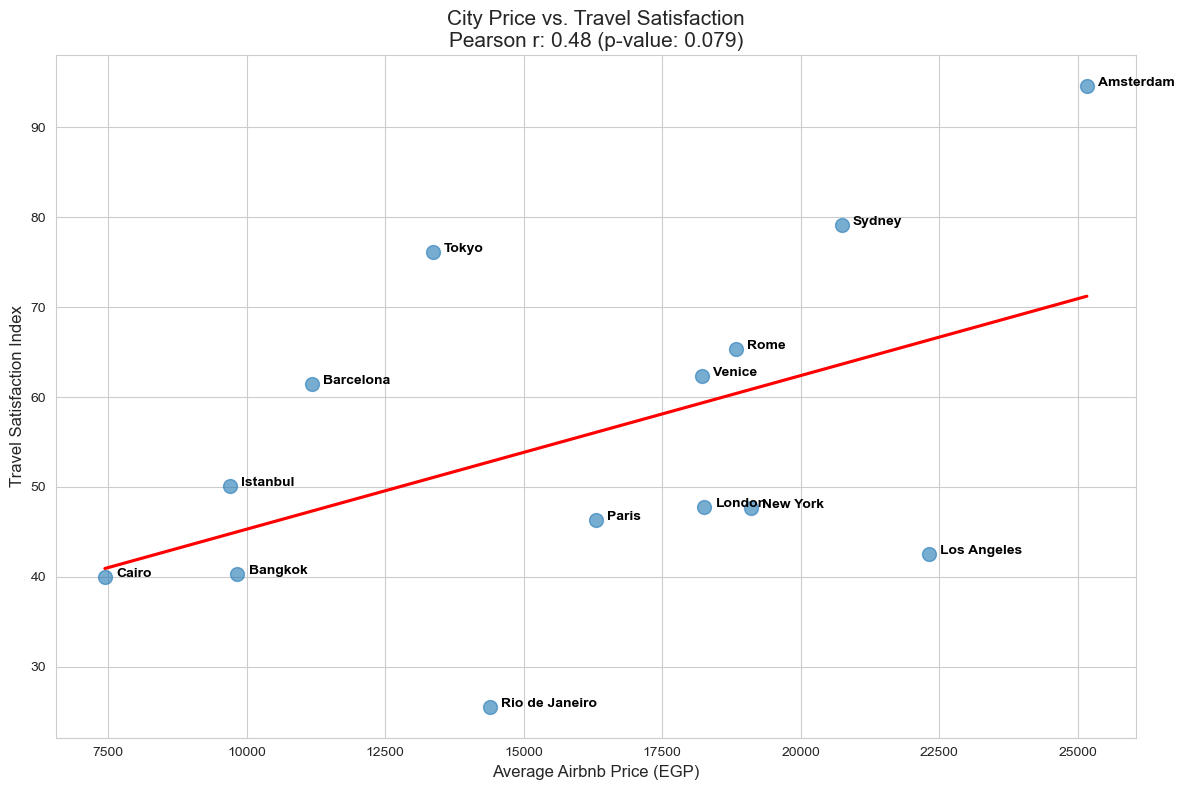

In [ ]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Create plot
p1 = sns.regplot(data=df_merged, x='Price_EGP', y='Travel_Score', 
                 ci=None, scatter_kws={'s':100, 'alpha':0.6}, line_kws={'color':'red'})

# Add labels for each city (This is the crucial missing part in your original plot)
for line in range(0, df_merged.shape[0]):
    p1.text(df_merged.Price_EGP[line]+200, df_merged.Travel_Score[line], 
            df_merged.Target_City[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

# Calculate correlation and p-value
corr_coef, p_value = pearsonr(df_merged['Price_EGP'], df_merged['Travel_Score'])

plt.title(f'City Price vs. Travel Satisfaction\nPearson r: {corr_coef:.2f} (p-value: {p_value:.3f})', fontsize=15)
plt.xlabel('Average Airbnb Price (EGP)', fontsize=12)
plt.ylabel('Travel Satisfaction Index', fontsize=12)
plt.tight_layout()

/var/folders/v2/2_ch1lnd2pn56b95t83hd7xr0000gn/T/ipykernel_13291/4155967658.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_sorted['Target_City'], rotation=45, ha='right')


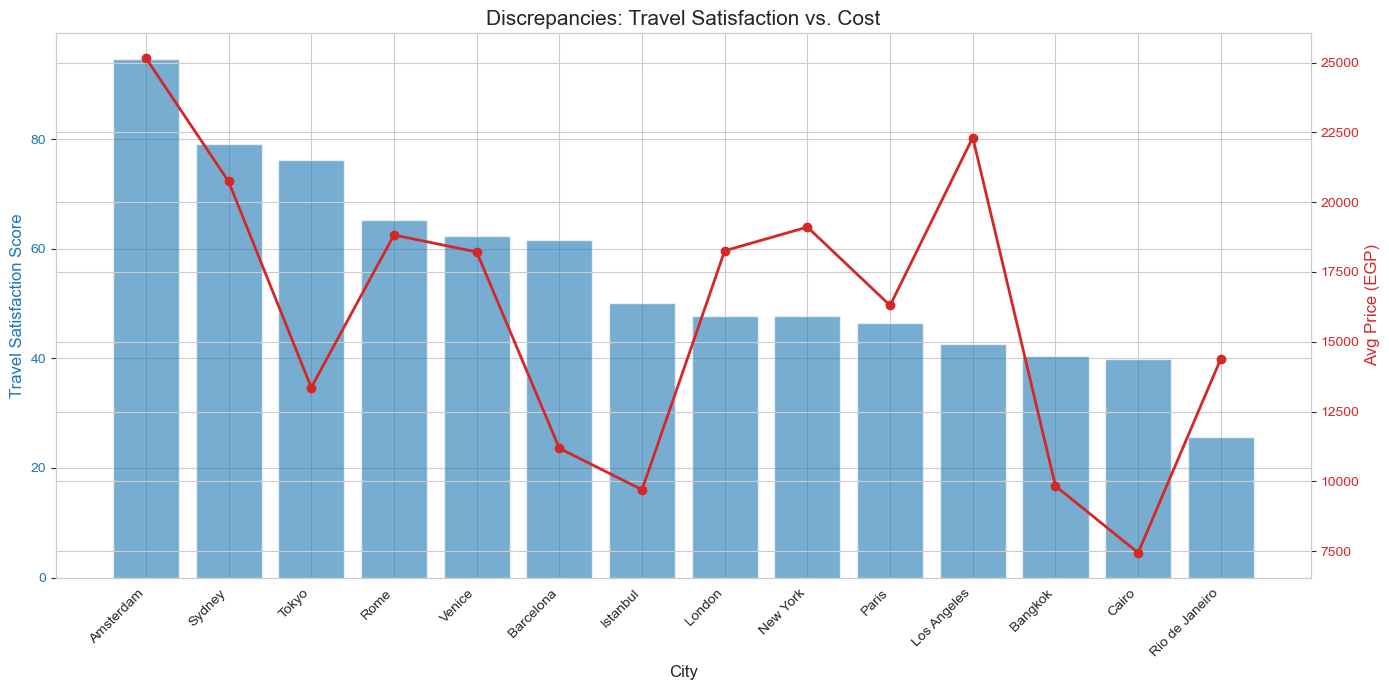

In [ ]:
df_sorted = df_merged.sort_values('Travel_Score', ascending=False)

fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar chart for Travel Score
color = 'tab:blue'
ax1.set_xlabel('City', fontsize=12)
ax1.set_ylabel('Travel Satisfaction Score', color=color, fontsize=12)
ax1.bar(df_sorted['Target_City'], df_sorted['Travel_Score'], color=color, alpha=0.6, label='Travel Score')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(df_sorted['Target_City'], rotation=45, ha='right')

# Line chart for Price on secondary axis
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Avg Price (EGP)', color=color, fontsize=12)  
ax2.plot(df_sorted['Target_City'], df_sorted['Price_EGP'], color=color, marker='o', linewidth=2, label='Price')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Discrepancies: Travel Satisfaction vs. Cost', fontsize=15)
fig.tight_layout()

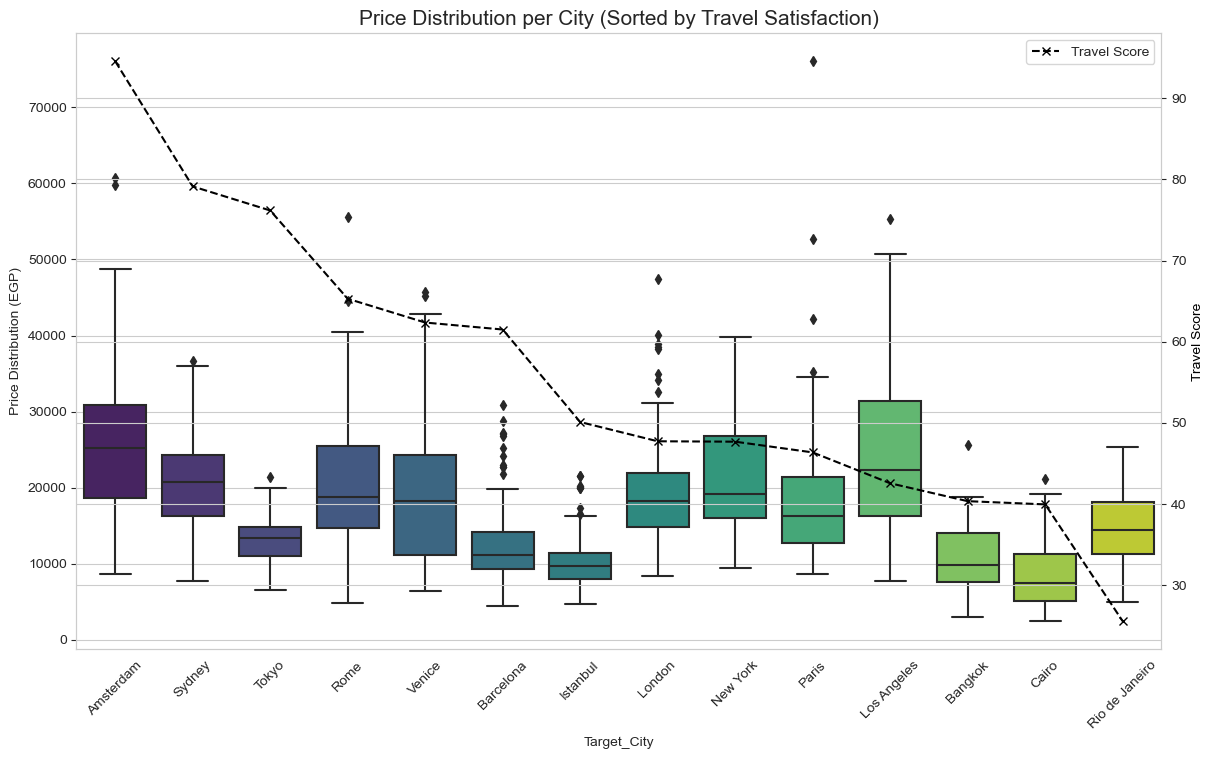

In [ ]:
order_list = df_sorted['Target_City'].tolist()

df_raw_merged = pd.merge(df_q1, df_sat, left_on='City', right_on='Target_City')

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_raw_merged, x='Target_City', y='Price_EGP', 
            palette='viridis', order=order_list) 

plt.xticks(rotation=45)
plt.title('Price Distribution per City (Sorted by Travel Satisfaction)', fontsize=15)
plt.ylabel('Price Distribution (EGP)')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(range(len(order_list)), df_sorted['Travel_Score'], 
         color='black', linestyle='--', marker='x', label='Travel Score')
ax2.set_ylabel('Travel Score', color='black')
ax2.legend(loc='upper right')

plt.show()

# Question Answer: Are cities with higher Airbnb prices also ranked higher on travel satisfaction indexes?

Generally: There appears to be a moderate positive association, as indicated by a Pearson Coefficient of 0.48. However, with a p-value of 0.079, this result is not statistically significant at the 0.05 level. While the trend suggests they may rise and fall together, we cannot rule out the possibility that this pattern is due to chance, likely due to the small sample size.